In [2]:
!pip install torch

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

print("GPU available:{}".format(torch.cuda.is_available()))

GPU available:True


In [4]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

**Normalise**

In [5]:
transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [6]:
trainset=torchvision.datasets.MNIST('mnist',train=True,download=True,transform=transform)
testset=torchvision.datasets.MNIST('mnist',train=False,download=True,transform=transform)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 18190673.17it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 493782.43it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 1774116.58it/s]


Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8414544.51it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [7]:
print(trainset.data.shape)
print(testset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [8]:
print(trainset.data[0].shape)
print(trainset.data[0])

torch.Size([28, 28])
tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,  

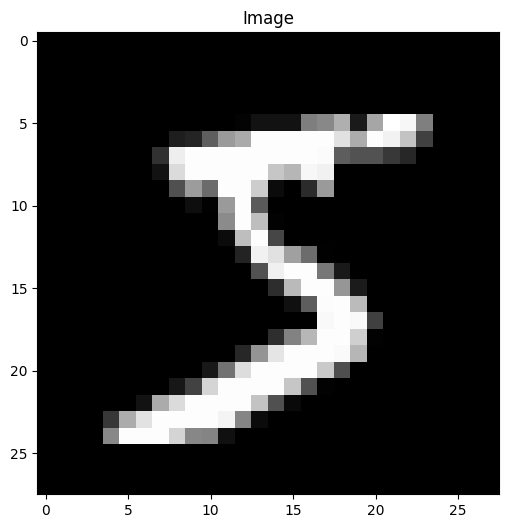

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imgshow(title="",image=None,size=6):
    w,h=image.shape[0],image.shape[1]
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.title(title)
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.show()

image=trainset.data[0].numpy()
imgshow("Image",image=image)

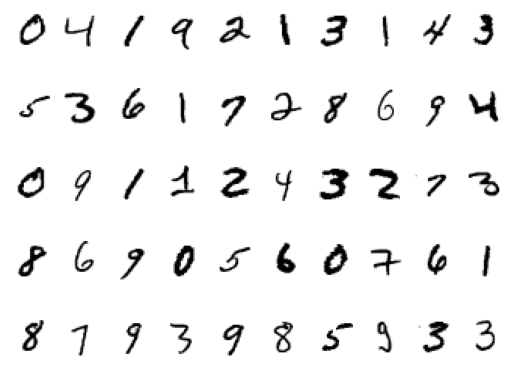

In [10]:
import matplotlib.pyplot as plt
figure=plt.figure()
num_of_images=50
for index in range(1,num_of_images+1):
    plt.subplot(5,10,index)
    plt.axis('off')
    plt.imshow(trainset.data[index],cmap='gray_r')

**Creating our Data Loader**

In [11]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=128,shuffle=True,num_workers=0)
testloader=torch.utils.data.DataLoader(testset,batch_size=128,shuffle=False,num_workers=0)
#

In [12]:
dataiter=iter(trainloader)
images,labels=next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([128, 1, 28, 28])
torch.Size([128])


**Alternatively PyTorch provides its own image Plotting Tool**

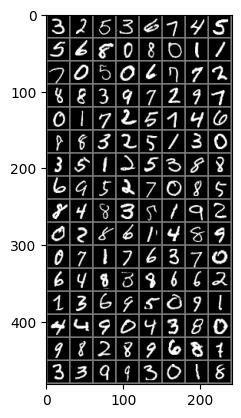

3 2 5 3 6 7 4 5 5 6 8 0 8 0 1 1 7 0 5 0 6 7 7 2 8 8 3 9 7 2 9 7 0 1 7 2 5 7 4 6 8 8 3 2 5 1 3 0 3 5 1 2 5 3 8 8 6 9 5 2 7 0 8 5 8 4 8 3 5 1 9 2 0 2 8 6 1 4 8 9 0 7 1 7 6 3 7 0 6 4 8 3 8 6 6 2 1 3 6 9 5 0 9 1 4 4 9 0 4 3 8 0 9 8 2 8 9 6 8 7 3 3 9 9 3 0 1 8


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img=img/2+0.5 #unnormalize
    npimg=img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter=iter(trainloader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join('%1s'%labels[j].numpy() for j in range(128)))

**Building a convolution Filter layer**

In [14]:
nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=1,padding=1)

Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [15]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    #super is a subclass of the nn.module and inherits all its methods
    super(Net,self).__init__()
    self.conv1=nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=1,padding=0)
    self.conv2=nn.Conv2d(32,64,3)
    #max pool layer 2*2 and stride 2
    self.pool=nn.MaxPool2d(2,2)
    #the first fully connected layer,, takes output of our max pool
    self.fc1=nn.Linear(64*12*12,128)
    self.fc2=nn.Linear(128,10)

  def forward(self,x):
    x=F.relu(self.conv1(x))
    x=self.pool(F.relu(self.conv2(x)))
    x=x.view(-1,64*12*12)
    x=F.relu(self.fc1(x))
    x=self.fc2(x)
    return x

net=Net()
net.to(device)
print(net)
#

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


**Defining Loss Function and Optimizer**

In [16]:
import torch.optim as optim

criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

**Training Our Model**

In [17]:
# We loop over the traing dataset multiple times (each time is called an epoch)
epochs = 10

# Create some empty arrays to store logs
epoch_log = []
loss_log = []
accuracy_log = []

# Iterate for a specified number of epochs
for epoch in range(epochs):
    print(f'Starting Epoch: {epoch+1}...')

    # We keep adding or accumulating our loss after each mini-batch in running_loss
    running_loss = 0.0

    # We iterate through our trainloader iterator
    # Each cycle is a minibatch
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # Move our data to GPU
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Clear the gradients before training by setting to zero
        # Required for a fresh start
        optimizer.zero_grad()

        # Forward -> backprop + optimize
        outputs = net(inputs) # Forward Propagation
        loss = criterion(outputs, labels) # Get Loss (quantify the difference between the results and predictions)
        loss.backward() # Back propagate to obtain the new gradients for all nodes
        optimizer.step() # Update the gradients/weights

        # Print Training statistics - Epoch/Iterations/Loss/Accuracy
        running_loss += loss.item()
        if i % 50 == 49:    # show our loss every 50 mini-batches
            correct = 0 # Initialize our variable to hold the count for the correct predictions
            total = 0 # Initialize our variable to hold the count of the number of labels iterated

            # We don't need gradients for validation, so wrap in
            # no_grad to save memory
            with torch.no_grad():
                # Iterate through the testloader iterator
                for data in testloader:
                    images, labels = data
                    # Move our data to GPU
                    images = images.to(device)
                    labels = labels.to(device)

                    # Foward propagate our test data batch through our model
                    outputs = net(images)

                     # Get predictions from the maximum value of the predicted output tensor
                     # we set dim = 1 as it specifies the number of dimensions to reduce
                    _, predicted = torch.max(outputs.data, dim = 1)
                    # Keep adding the label size or length to the total variable
                    total += labels.size(0)
                    # Keep a running total of the number of predictions predicted correctly
                    correct += (predicted == labels).sum().item()

                accuracy = 100 * correct / total
                epoch_num = epoch + 1
                actual_loss = running_loss / 50
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)}, Loss: {actual_loss:.3f}, Test Accuracy = {accuracy:.3f}%')
                running_loss = 0.0

    # Store training stats after each epoch
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)

print('Finished Training')

Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 2.272, Test Accuracy = 52.840%
Epoch: 1, Mini-Batches Completed: 100, Loss: 2.135, Test Accuracy = 66.560%
Epoch: 1, Mini-Batches Completed: 150, Loss: 1.739, Test Accuracy = 76.230%
Epoch: 1, Mini-Batches Completed: 200, Loss: 1.032, Test Accuracy = 83.070%
Epoch: 1, Mini-Batches Completed: 250, Loss: 0.620, Test Accuracy = 86.880%
Epoch: 1, Mini-Batches Completed: 300, Loss: 0.487, Test Accuracy = 88.190%
Epoch: 1, Mini-Batches Completed: 350, Loss: 0.406, Test Accuracy = 88.630%
Epoch: 1, Mini-Batches Completed: 400, Loss: 0.387, Test Accuracy = 89.780%
Epoch: 1, Mini-Batches Completed: 450, Loss: 0.367, Test Accuracy = 90.380%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.342, Test Accuracy = 90.730%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.323, Test Accuracy = 91.430%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.309, Test Accuracy = 91.430%
Epoch: 2, Mini-Batches Completed: 200, Loss: 0.3

**Saving our Model**

In [18]:
Path='./mnist_net.pth'
torch.save(net.state_dict(),Path)

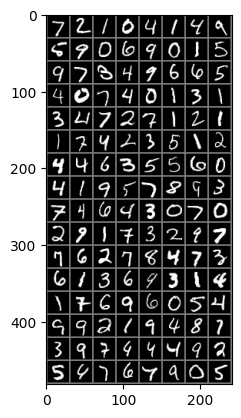

GroundTruth:     7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1     3     4     7     2     7     1     2     1     1     7     4     2     3     5     1     2     4     4     6     3     5     5     6     0     4     1     9     5     7     8     9     3     7     4     6     4     3     0     7     0     2     9     1     7     3     2     9     7     7     6     2     7     8     4     7     3     6     1     3     6     9     3     1     4     1     7     6     9     6     0     5     4     9     9     2     1     9     4     8     7     3     9     7     4     4     4     9     2     5     4     7     6     7     9     0     5


In [19]:
dataiter=iter(testloader)
images,labels=next(dataiter)
imshow(torchvision.utils.make_grid(images))
print('GroundTruth:',' '.join('%5s'%labels[j].numpy() for j in range(128)))

**Load the save Model**

In [20]:
net=Net()
net.to(device)
net.load_state_dict(torch.load(Path))


<ipython-input-20-2ebc910f1216>:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(Path))


<All keys matched successfully>

**Get Predictions**

In [21]:
test_iter=iter(testloader)
images,labels=next(test_iter)
images=images.to(device)
labels=labels.to(device)
outputs=net(images)
_,predicted=torch.max(outputs,1)
print('Predicted:',' '.join('%1s'% predicted[j].cpu().numpy() for j in range(128)))

Predicted: 7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 4 7 2 7 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 6 4 3 0 7 0 2 9 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 9 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2 5 4 7 6 7 9 0 5


**Showing our Test Accuracy again**

In [22]:
correct=0
total=0
with torch.no_grad():
  for data in testloader:
    images,labels=data
    images=images.to(device)
    labels=labels.to(device)
    outputs=net(images)
    _,predicted=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(predicted==labels).sum().item()
accuracy=100*correct/total
print(f'Accuracy of the network on the 10000 test images: {accuracy:.3}%')

Accuracy of the network on the 10000 test images: 98.0%


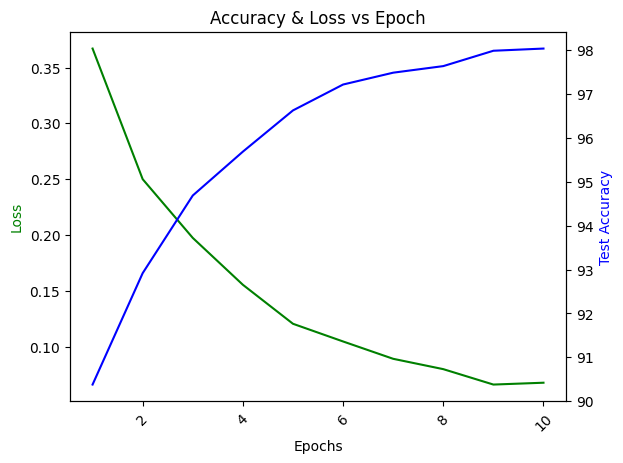

In [23]:
# To create a plot with secondary y-axis we need to create a subplot
fig, ax1 = plt.subplots()

# Set title and x-axis label rotation
plt.title("Accuracy & Loss vs Epoch")
plt.xticks(rotation=45)

# We use twinx to create a plot a secondary y axis
ax2 = ax1.twinx()

# Create plot for loss_log and accuracy_log
ax1.plot(epoch_log, loss_log, 'g-')
ax2.plot(epoch_log, accuracy_log, 'b-')

# Set labels
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Test Accuracy', color='b')

plt.show()

In [24]:
epoch_log = list(range(1,11))
epoch_log

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
list(range(1,10))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**observation**

In [26]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

# We don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.max() to get the predicted class for the first dim of our batch
        # note this is just the first 16 data points/images of our batch of 128 images
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()

        for i in range(15):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    class_accuracy = 100 * class_correct[i] / class_total[i]
    print(f'Accuracy of {i} : {class_accuracy:.3f}%')

Accuracy of 0 : 99.130%
Accuracy of 1 : 97.744%
Accuracy of 2 : 94.531%
Accuracy of 3 : 99.167%
Accuracy of 4 : 95.276%
Accuracy of 5 : 99.074%
Accuracy of 6 : 99.074%
Accuracy of 7 : 98.374%
Accuracy of 8 : 99.000%
Accuracy of 9 : 95.935%


Actual Label: 0, Predicted Label: 6


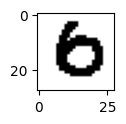

Actual Label: 7, Predicted Label: 2


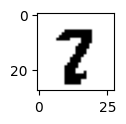

Actual Label: 3, Predicted Label: 5


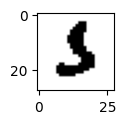

Actual Label: 0, Predicted Label: 6


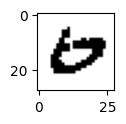

Actual Label: 8, Predicted Label: 9


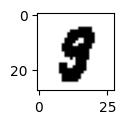

Actual Label: 5, Predicted Label: 3


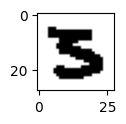

Actual Label: 2, Predicted Label: 8


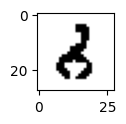

Actual Label: 8, Predicted Label: 2


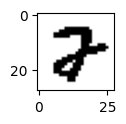

Actual Label: 8, Predicted Label: 2


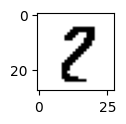

Actual Label: 8, Predicted Label: 1


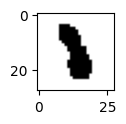

Actual Label: 1, Predicted Label: 2


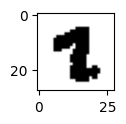

Actual Label: 3, Predicted Label: 7


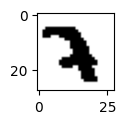

Actual Label: 6, Predicted Label: 0


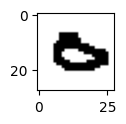

Actual Label: 8, Predicted Label: 5


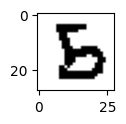

Actual Label: 9, Predicted Label: 4


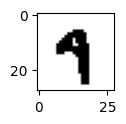

Actual Label: 8, Predicted Label: 9


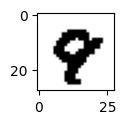

Actual Label: 7, Predicted Label: 9


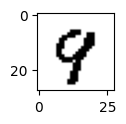

Actual Label: 5, Predicted Label: 3


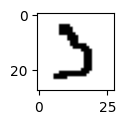

Actual Label: 5, Predicted Label: 3


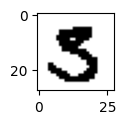

Actual Label: 9, Predicted Label: 8


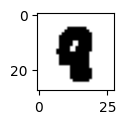

Actual Label: 0, Predicted Label: 6


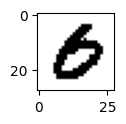

Actual Label: 5, Predicted Label: 6


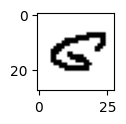

Actual Label: 2, Predicted Label: 7


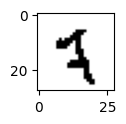

Actual Label: 8, Predicted Label: 6


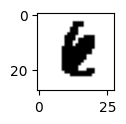

Actual Label: 6, Predicted Label: 4


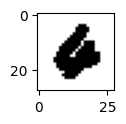

Actual Label: 8, Predicted Label: 6


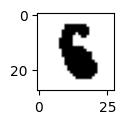

Actual Label: 2, Predicted Label: 7


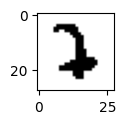

Actual Label: 4, Predicted Label: 9


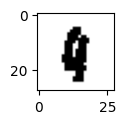

Actual Label: 9, Predicted Label: 4


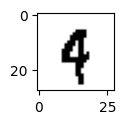

Actual Label: 0, Predicted Label: 9


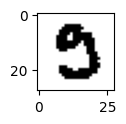

Actual Label: 7, Predicted Label: 5


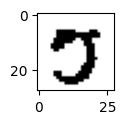

Actual Label: 3, Predicted Label: 8


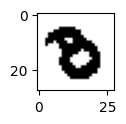

Actual Label: 2, Predicted Label: 7


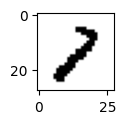

Actual Label: 6, Predicted Label: 2


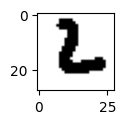

Actual Label: 3, Predicted Label: 5


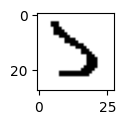

Actual Label: 8, Predicted Label: 1


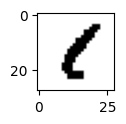

Actual Label: 1, Predicted Label: 7


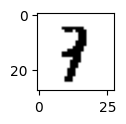

Actual Label: 9, Predicted Label: 7


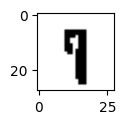

Actual Label: 6, Predicted Label: 1


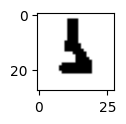

Actual Label: 7, Predicted Label: 8


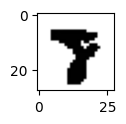

Actual Label: 6, Predicted Label: 4


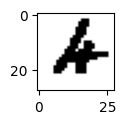

Actual Label: 3, Predicted Label: 9


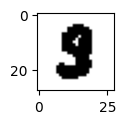

Actual Label: 6, Predicted Label: 2


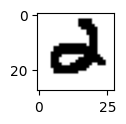

Actual Label: 6, Predicted Label: 0


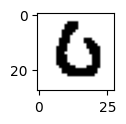

Actual Label: 0, Predicted Label: 2


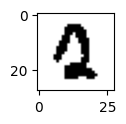

Actual Label: 7, Predicted Label: 3


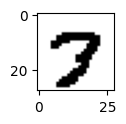

Actual Label: 5, Predicted Label: 9


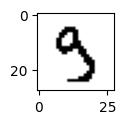

Actual Label: 0, Predicted Label: 8


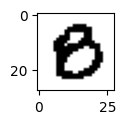

Actual Label: 2, Predicted Label: 7


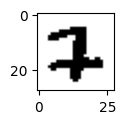

Actual Label: 6, Predicted Label: 1


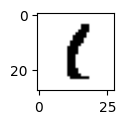

Actual Label: 8, Predicted Label: 2


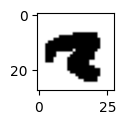

Actual Label: 4, Predicted Label: 9


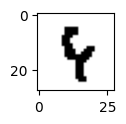

Actual Label: 0, Predicted Label: 5


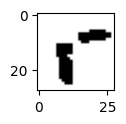

Actual Label: 2, Predicted Label: 7


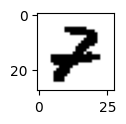

Actual Label: 7, Predicted Label: 1


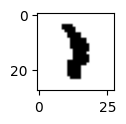

Actual Label: 3, Predicted Label: 5


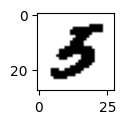

Actual Label: 6, Predicted Label: 5


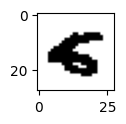

Actual Label: 8, Predicted Label: 4


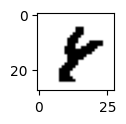

Actual Label: 7, Predicted Label: 2


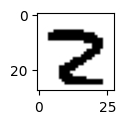

Actual Label: 9, Predicted Label: 4


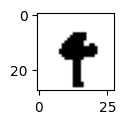

Actual Label: 0, Predicted Label: 2


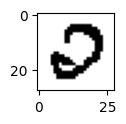

Actual Label: 7, Predicted Label: 3


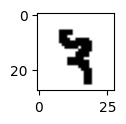

Actual Label: 0, Predicted Label: 6


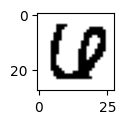

Actual Label: 9, Predicted Label: 5


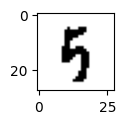

Actual Label: 8, Predicted Label: 9


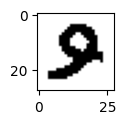

Actual Label: 9, Predicted Label: 4


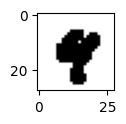

Actual Label: 1, Predicted Label: 6


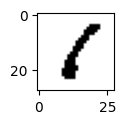

Actual Label: 2, Predicted Label: 1


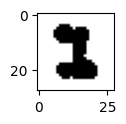

Actual Label: 8, Predicted Label: 0


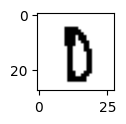

Actual Label: 3, Predicted Label: 2


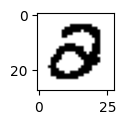

Actual Label: 1, Predicted Label: 9


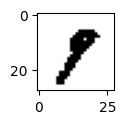

Actual Label: 8, Predicted Label: 5


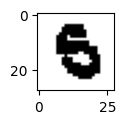

Actual Label: 0, Predicted Label: 8


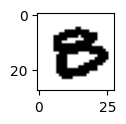

Actual Label: 0, Predicted Label: 9


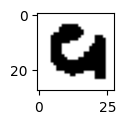

Actual Label: 1, Predicted Label: 9


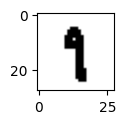

Actual Label: 1, Predicted Label: 9


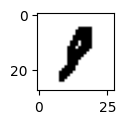

Actual Label: 4, Predicted Label: 9


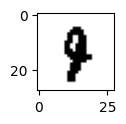

Actual Label: 1, Predicted Label: 2


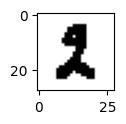

Actual Label: 8, Predicted Label: 6


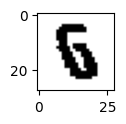

Actual Label: 0, Predicted Label: 2


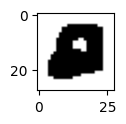

Actual Label: 4, Predicted Label: 2


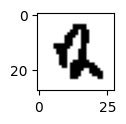

Actual Label: 8, Predicted Label: 7


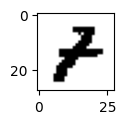

Actual Label: 0, Predicted Label: 9


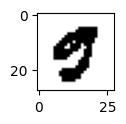

Actual Label: 1, Predicted Label: 6


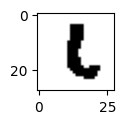

Actual Label: 4, Predicted Label: 9


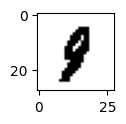

Actual Label: 3, Predicted Label: 2


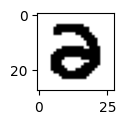

Actual Label: 0, Predicted Label: 8


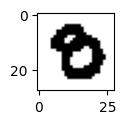

Actual Label: 7, Predicted Label: 9


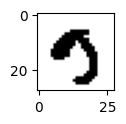

Actual Label: 3, Predicted Label: 5


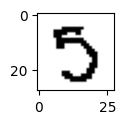

Actual Label: 7, Predicted Label: 9


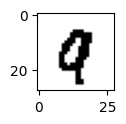

Actual Label: 8, Predicted Label: 6


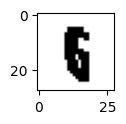

Actual Label: 7, Predicted Label: 9


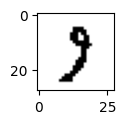

Actual Label: 2, Predicted Label: 1


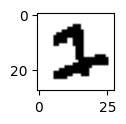

Actual Label: 3, Predicted Label: 8


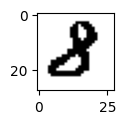

Actual Label: 8, Predicted Label: 2


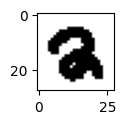

Actual Label: 3, Predicted Label: 2


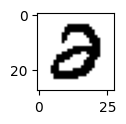

Actual Label: 6, Predicted Label: 2


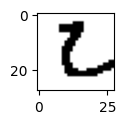

Actual Label: 0, Predicted Label: 6


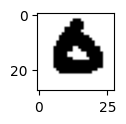

Actual Label: 1, Predicted Label: 9


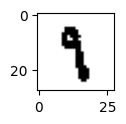

Actual Label: 4, Predicted Label: 6


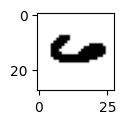

Actual Label: 0, Predicted Label: 5


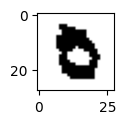

Actual Label: 3, Predicted Label: 9


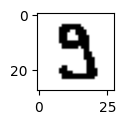

Actual Label: 7, Predicted Label: 2


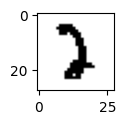

Actual Label: 3, Predicted Label: 2


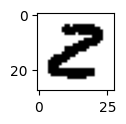

Actual Label: 9, Predicted Label: 4


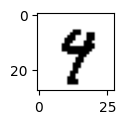

Actual Label: 9, Predicted Label: 4


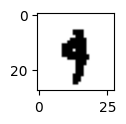

Actual Label: 2, Predicted Label: 7


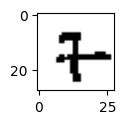

Actual Label: 8, Predicted Label: 7


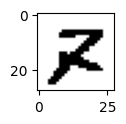

Actual Label: 6, Predicted Label: 4


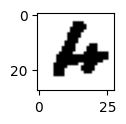

Actual Label: 8, Predicted Label: 2


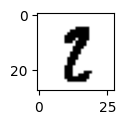

Actual Label: 3, Predicted Label: 7


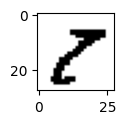

Actual Label: 3, Predicted Label: 2


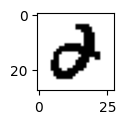

Actual Label: 4, Predicted Label: 9


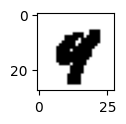

Actual Label: 6, Predicted Label: 5


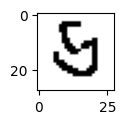

Actual Label: 3, Predicted Label: 1


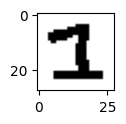

Actual Label: 6, Predicted Label: 4


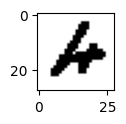

Actual Label: 1, Predicted Label: 7


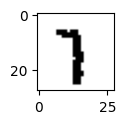

Actual Label: 9, Predicted Label: 7


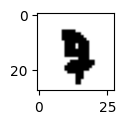

Actual Label: 2, Predicted Label: 0


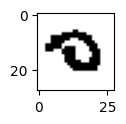

Actual Label: 0, Predicted Label: 8


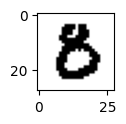

Actual Label: 3, Predicted Label: 9


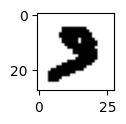

Actual Label: 4, Predicted Label: 9


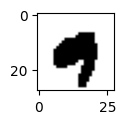

Actual Label: 0, Predicted Label: 9


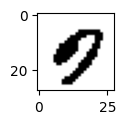

Actual Label: 7, Predicted Label: 2


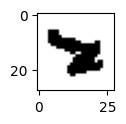

Actual Label: 7, Predicted Label: 9


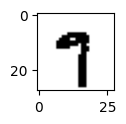

Actual Label: 3, Predicted Label: 7


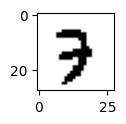

Actual Label: 8, Predicted Label: 2


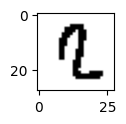

Actual Label: 8, Predicted Label: 2


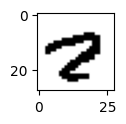

Actual Label: 8, Predicted Label: 5


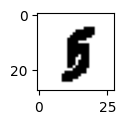

Actual Label: 0, Predicted Label: 2


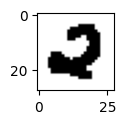

Actual Label: 5, Predicted Label: 6


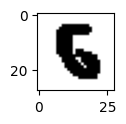

Actual Label: 6, Predicted Label: 5


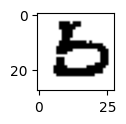

Actual Label: 4, Predicted Label: 8


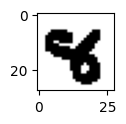

Actual Label: 4, Predicted Label: 2


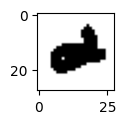

Actual Label: 9, Predicted Label: 3


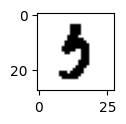

Actual Label: 8, Predicted Label: 9


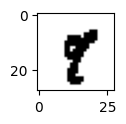

Actual Label: 0, Predicted Label: 8


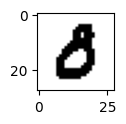

Actual Label: 0, Predicted Label: 6


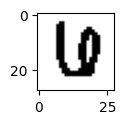

Actual Label: 4, Predicted Label: 9


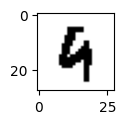

Actual Label: 0, Predicted Label: 9


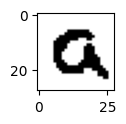

Actual Label: 8, Predicted Label: 0


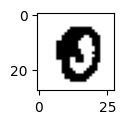

Actual Label: 4, Predicted Label: 8


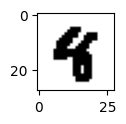

Actual Label: 8, Predicted Label: 7


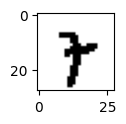

Actual Label: 3, Predicted Label: 2


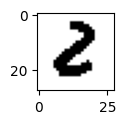

Actual Label: 6, Predicted Label: 1


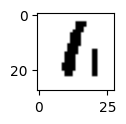

Actual Label: 9, Predicted Label: 7


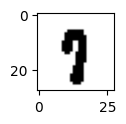

Actual Label: 3, Predicted Label: 2


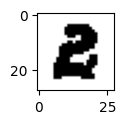

Actual Label: 8, Predicted Label: 1


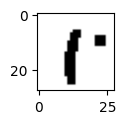

Actual Label: 7, Predicted Label: 3


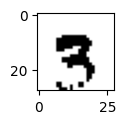

Actual Label: 6, Predicted Label: 8


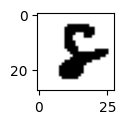

Actual Label: 7, Predicted Label: 4


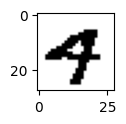

Actual Label: 0, Predicted Label: 7


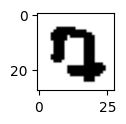

Actual Label: 0, Predicted Label: 4


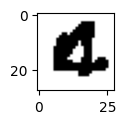

Actual Label: 3, Predicted Label: 5


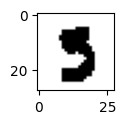

Actual Label: 8, Predicted Label: 3


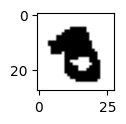

Actual Label: 8, Predicted Label: 3


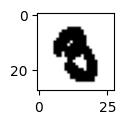

Actual Label: 9, Predicted Label: 3


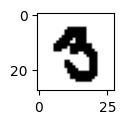

Actual Label: 8, Predicted Label: 3


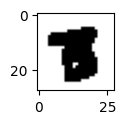

Actual Label: 3, Predicted Label: 9


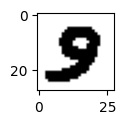

Actual Label: 5, Predicted Label: 9


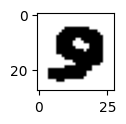

Actual Label: 3, Predicted Label: 9


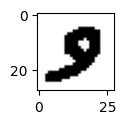

Actual Label: 3, Predicted Label: 9


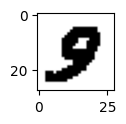

Actual Label: 5, Predicted Label: 9


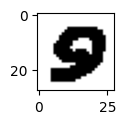

Actual Label: 0, Predicted Label: 9


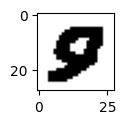

Actual Label: 0, Predicted Label: 9


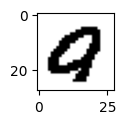

Actual Label: 7, Predicted Label: 9


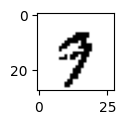

Actual Label: 6, Predicted Label: 2


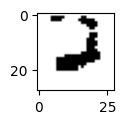

Actual Label: 7, Predicted Label: 0


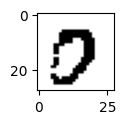

Actual Label: 2, Predicted Label: 8


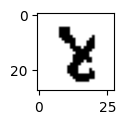

Actual Label: 8, Predicted Label: 0


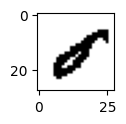

Actual Label: 4, Predicted Label: 6


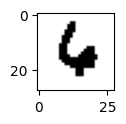

Actual Label: 8, Predicted Label: 4


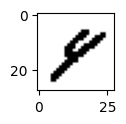

Actual Label: 8, Predicted Label: 5


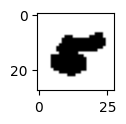

Actual Label: 4, Predicted Label: 2


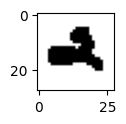

Actual Label: 8, Predicted Label: 1


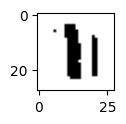

Actual Label: 1, Predicted Label: 2


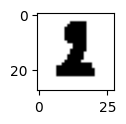

Actual Label: 8, Predicted Label: 5


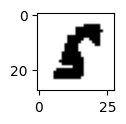

Actual Label: 1, Predicted Label: 2


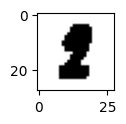

Actual Label: 5, Predicted Label: 8


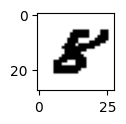

Actual Label: 6, Predicted Label: 8


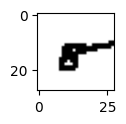

Actual Label: 6, Predicted Label: 8


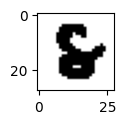

Actual Label: 2, Predicted Label: 7


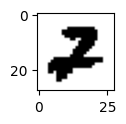

Actual Label: 2, Predicted Label: 7


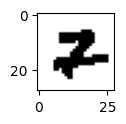

Actual Label: 2, Predicted Label: 7


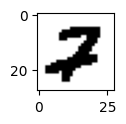

Actual Label: 8, Predicted Label: 1


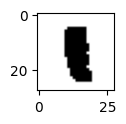

Actual Label: 8, Predicted Label: 1


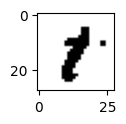

Actual Label: 4, Predicted Label: 9


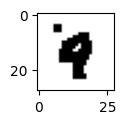

Actual Label: 8, Predicted Label: 0


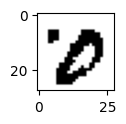

Actual Label: 7, Predicted Label: 9


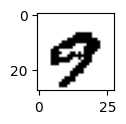

Actual Label: 7, Predicted Label: 2


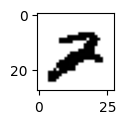

Actual Label: 7, Predicted Label: 9


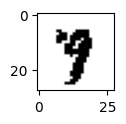

Actual Label: 6, Predicted Label: 5


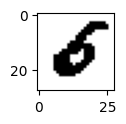

Actual Label: 6, Predicted Label: 5


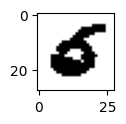

Actual Label: 8, Predicted Label: 2


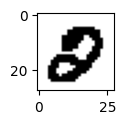

Actual Label: 0, Predicted Label: 5


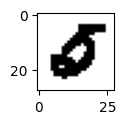

Actual Label: 8, Predicted Label: 2


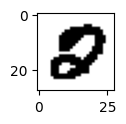

Actual Label: 7, Predicted Label: 4


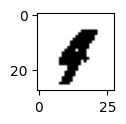

Actual Label: 8, Predicted Label: 2


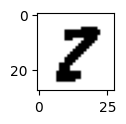

Actual Label: 7, Predicted Label: 2


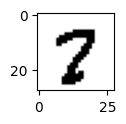

Actual Label: 5, Predicted Label: 9


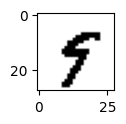

Actual Label: 7, Predicted Label: 3


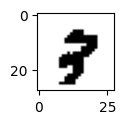

Actual Label: 6, Predicted Label: 5


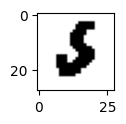

In [27]:
net.eval()

# We don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the label
        # then we print out the actual ground truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {pred}, Predicted Label: {label}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

In [28]:
nb_classes = 10

confusion_matrix = torch.zeros(nb_classes, nb_classes)

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print(confusion_matrix)

tensor([[9.7200e+02, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         2.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.1220e+03, 2.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         3.0000e+00, 1.0000e+00, 6.0000e+00, 0.0000e+00],
        [4.0000e+00, 4.0000e+00, 9.9400e+02, 7.0000e+00, 3.0000e+00, 0.0000e+00,
         4.0000e+00, 6.0000e+00, 1.0000e+01, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00, 9.9800e+02, 0.0000e+00, 3.0000e+00,
         0.0000e+00, 4.0000e+00, 3.0000e+00, 2.0000e+00],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.6700e+02, 0.0000e+00,
         4.0000e+00, 2.0000e+00, 2.0000e+00, 6.0000e+00],
        [3.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00, 0.0000e+00, 8.7100e+02,
         6.0000e+00, 1.0000e+00, 5.0000e+00, 1.0000e+00],
        [6.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00,
         9.4200e+02, 0.0000e+00, 4.0000e+00, 0.0000e+00],
        [1.0000e+00, 2.0000

In [29]:
print(confusion_matrix.diag()/confusion_matrix.sum(1))

tensor([0.9918, 0.9885, 0.9632, 0.9881, 0.9847, 0.9765, 0.9833, 0.9796, 0.9825,
        0.9594])


In [30]:
from sklearn.metrics import confusion_matrix

nb_classes = 10

# Initialize the prediction and label lists(tensors)
predlist=torch.zeros(0,dtype=torch.long, device='cpu')
lbllist=torch.zeros(0,dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        predlist=torch.cat([predlist,preds.view(-1).cpu()])
        lbllist=torch.cat([lbllist,classes.view(-1).cpu()])

# Confusion matrix
conf_mat=confusion_matrix(lbllist.numpy(), predlist.numpy())
print(conf_mat)

# Per-class accuracy
class_accuracy=100*conf_mat.diagonal()/conf_mat.sum(1)
print(class_accuracy)

[[ 972    0    1    0    0    0    2    1    4    0]
 [   0 1122    2    1    0    0    3    1    6    0]
 [   4    4  994    7    3    0    4    6   10    0]
 [   0    0    0  998    0    3    0    4    3    2]
 [   1    0    0    0  967    0    4    2    2    6]
 [   3    0    0    5    0  871    6    1    5    1]
 [   6    2    0    0    2    2  942    0    4    0]
 [   1    2    9    3    0    0    0 1007    3    3]
 [   5    0    2    2    2    1    3    1  957    1]
 [   7    4    0    6    8    4    0    8    4  968]]
[99.18367347 98.85462555 96.31782946 98.81188119 98.47250509 97.64573991
 98.32985386 97.95719844 98.25462012 95.93657086]


**Setup our pytorch Imports, Model and Load the MNIST Dataset**

In [31]:
# Import PyTorch
import torch

# We use torchvision to get our dataset and useful image transformations
import torchvision
import torchvision.transforms as transforms

# Import PyTorch's optimization libary and nn
# nn is used as the basic building block for our Network graphs
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

# Are we using our GPU?
print("GPU available: {}".format(torch.cuda.is_available()))

# Set device to cuda
device = 'cuda'

GPU available: True


In [32]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imgshow(title, image = None, size = 6):
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()

In [33]:
# Transform to a PyTorch tensors and the normalize our valeus between -1 and +1
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, )) ])

# Load our Test Data and specify what transform to use when loading
testset = torchvision.datasets.MNIST('mnist',
                                     train = False,
                                     download = True,
                                     transform = transform)

testloader = torch.utils.data.DataLoader(testset,
                                          batch_size = 128,
                                          shuffle = False,
                                          num_workers = 0)

In [34]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [36]:
# Create an instance of the model
net = Net()
net.to(device)

# Load weights from the specified path
net.load_state_dict(torch.load('mnist_net.pth'))

<ipython-input-36-668465b9a992>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('mnist_net.pth'))


<All keys matched successfully>

**Displaying Our Misclassified Images**

Actual Label: 6, Predicted Label: 0


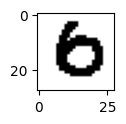

Actual Label: 2, Predicted Label: 7


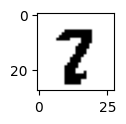

Actual Label: 5, Predicted Label: 3


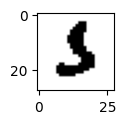

Actual Label: 6, Predicted Label: 0


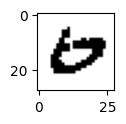

Actual Label: 9, Predicted Label: 8


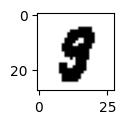

Actual Label: 3, Predicted Label: 5


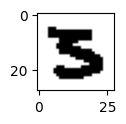

Actual Label: 8, Predicted Label: 2


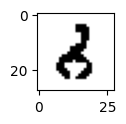

Actual Label: 2, Predicted Label: 8


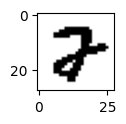

Actual Label: 2, Predicted Label: 8


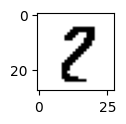

Actual Label: 1, Predicted Label: 8


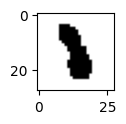

Actual Label: 2, Predicted Label: 1


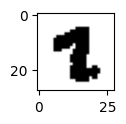

Actual Label: 7, Predicted Label: 3


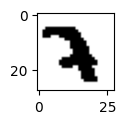

Actual Label: 0, Predicted Label: 6


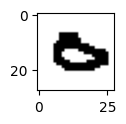

Actual Label: 5, Predicted Label: 8


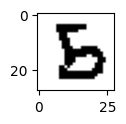

Actual Label: 4, Predicted Label: 9


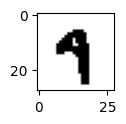

Actual Label: 9, Predicted Label: 8


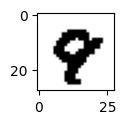

Actual Label: 9, Predicted Label: 7


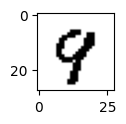

Actual Label: 3, Predicted Label: 5


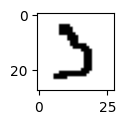

Actual Label: 3, Predicted Label: 5


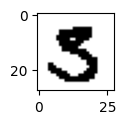

Actual Label: 8, Predicted Label: 9


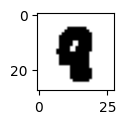

Actual Label: 6, Predicted Label: 0


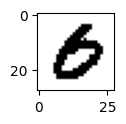

Actual Label: 6, Predicted Label: 5


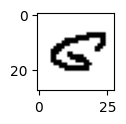

Actual Label: 7, Predicted Label: 2


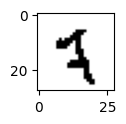

Actual Label: 6, Predicted Label: 8


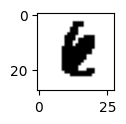

Actual Label: 4, Predicted Label: 6


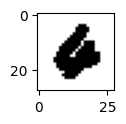

Actual Label: 6, Predicted Label: 8


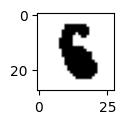

Actual Label: 7, Predicted Label: 2


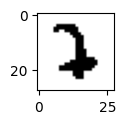

Actual Label: 9, Predicted Label: 4


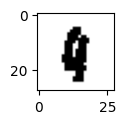

Actual Label: 4, Predicted Label: 9


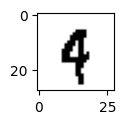

Actual Label: 9, Predicted Label: 0


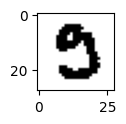

Actual Label: 5, Predicted Label: 7


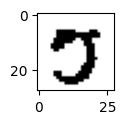

Actual Label: 8, Predicted Label: 3


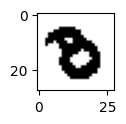

Actual Label: 7, Predicted Label: 2


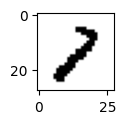

Actual Label: 2, Predicted Label: 6


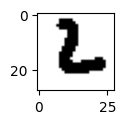

Actual Label: 5, Predicted Label: 3


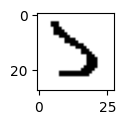

Actual Label: 1, Predicted Label: 8


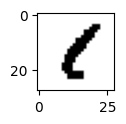

Actual Label: 7, Predicted Label: 1


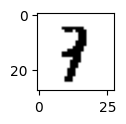

Actual Label: 7, Predicted Label: 9


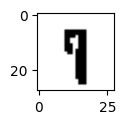

Actual Label: 1, Predicted Label: 6


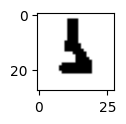

Actual Label: 8, Predicted Label: 7


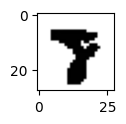

Actual Label: 4, Predicted Label: 6


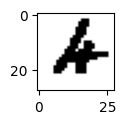

Actual Label: 9, Predicted Label: 3


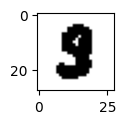

Actual Label: 2, Predicted Label: 6


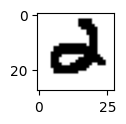

Actual Label: 0, Predicted Label: 6


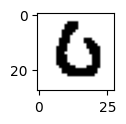

Actual Label: 2, Predicted Label: 0


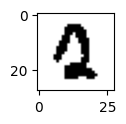

Actual Label: 3, Predicted Label: 7


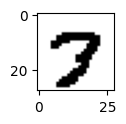

Actual Label: 9, Predicted Label: 5


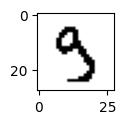

Actual Label: 8, Predicted Label: 0


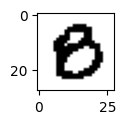

Actual Label: 7, Predicted Label: 2


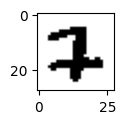

Actual Label: 1, Predicted Label: 6


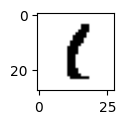

Actual Label: 2, Predicted Label: 8


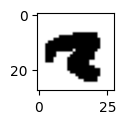

Actual Label: 9, Predicted Label: 4


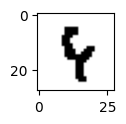

Actual Label: 5, Predicted Label: 0


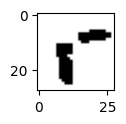

Actual Label: 7, Predicted Label: 2


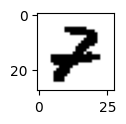

Actual Label: 1, Predicted Label: 7


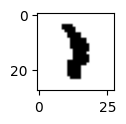

Actual Label: 5, Predicted Label: 3


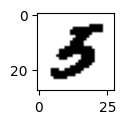

Actual Label: 5, Predicted Label: 6


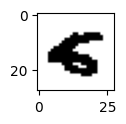

Actual Label: 4, Predicted Label: 8


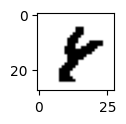

Actual Label: 2, Predicted Label: 7


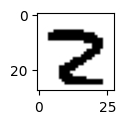

Actual Label: 4, Predicted Label: 9


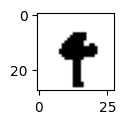

Actual Label: 2, Predicted Label: 0


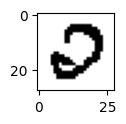

Actual Label: 3, Predicted Label: 7


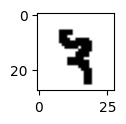

Actual Label: 6, Predicted Label: 0


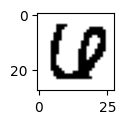

Actual Label: 5, Predicted Label: 9


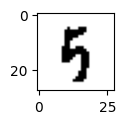

Actual Label: 9, Predicted Label: 8


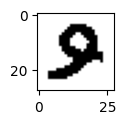

Actual Label: 4, Predicted Label: 9


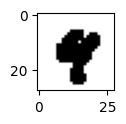

Actual Label: 6, Predicted Label: 1


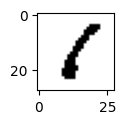

Actual Label: 1, Predicted Label: 2


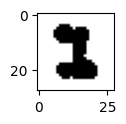

Actual Label: 0, Predicted Label: 8


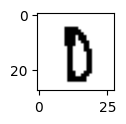

Actual Label: 2, Predicted Label: 3


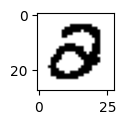

Actual Label: 9, Predicted Label: 1


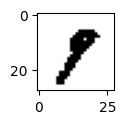

Actual Label: 5, Predicted Label: 8


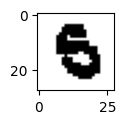

Actual Label: 8, Predicted Label: 0


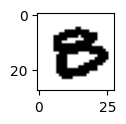

Actual Label: 9, Predicted Label: 0


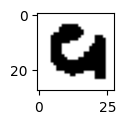

Actual Label: 9, Predicted Label: 1


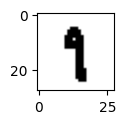

Actual Label: 9, Predicted Label: 1


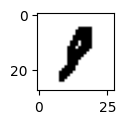

Actual Label: 9, Predicted Label: 4


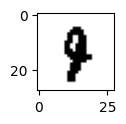

Actual Label: 2, Predicted Label: 1


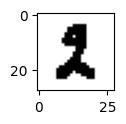

Actual Label: 6, Predicted Label: 8


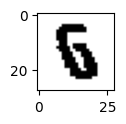

Actual Label: 2, Predicted Label: 0


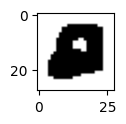

Actual Label: 2, Predicted Label: 4


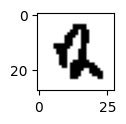

Actual Label: 7, Predicted Label: 8


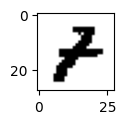

Actual Label: 9, Predicted Label: 0


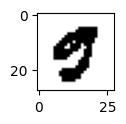

Actual Label: 6, Predicted Label: 1


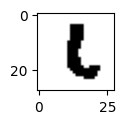

Actual Label: 9, Predicted Label: 4


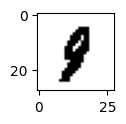

Actual Label: 2, Predicted Label: 3


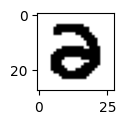

Actual Label: 8, Predicted Label: 0


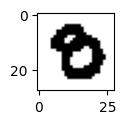

Actual Label: 9, Predicted Label: 7


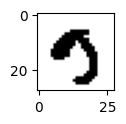

Actual Label: 5, Predicted Label: 3


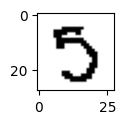

Actual Label: 9, Predicted Label: 7


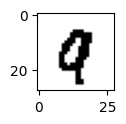

Actual Label: 6, Predicted Label: 8


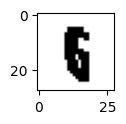

Actual Label: 9, Predicted Label: 7


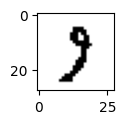

Actual Label: 1, Predicted Label: 2


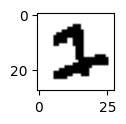

Actual Label: 8, Predicted Label: 3


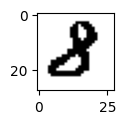

Actual Label: 2, Predicted Label: 8


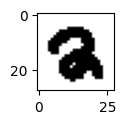

Actual Label: 2, Predicted Label: 3


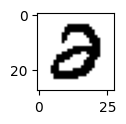

Actual Label: 2, Predicted Label: 6


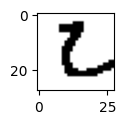

Actual Label: 6, Predicted Label: 0


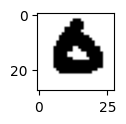

Actual Label: 9, Predicted Label: 1


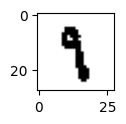

Actual Label: 6, Predicted Label: 4


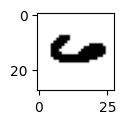

Actual Label: 5, Predicted Label: 0


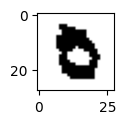

Actual Label: 9, Predicted Label: 3


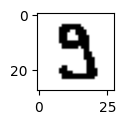

Actual Label: 2, Predicted Label: 7


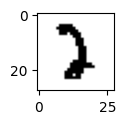

Actual Label: 2, Predicted Label: 3


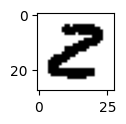

Actual Label: 4, Predicted Label: 9


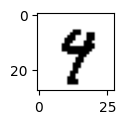

Actual Label: 4, Predicted Label: 9


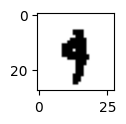

Actual Label: 7, Predicted Label: 2


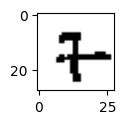

Actual Label: 7, Predicted Label: 8


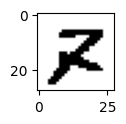

Actual Label: 4, Predicted Label: 6


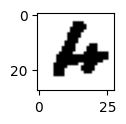

Actual Label: 2, Predicted Label: 8


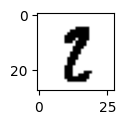

Actual Label: 7, Predicted Label: 3


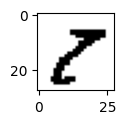

Actual Label: 2, Predicted Label: 3


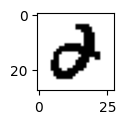

Actual Label: 9, Predicted Label: 4


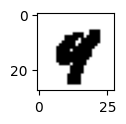

Actual Label: 5, Predicted Label: 6


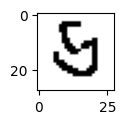

Actual Label: 1, Predicted Label: 3


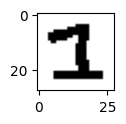

Actual Label: 4, Predicted Label: 6


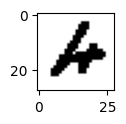

Actual Label: 7, Predicted Label: 1


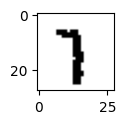

Actual Label: 7, Predicted Label: 9


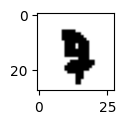

Actual Label: 0, Predicted Label: 2


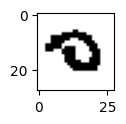

Actual Label: 8, Predicted Label: 0


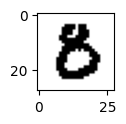

Actual Label: 9, Predicted Label: 3


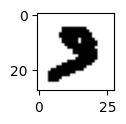

Actual Label: 9, Predicted Label: 4


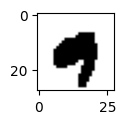

Actual Label: 9, Predicted Label: 0


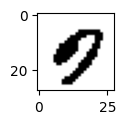

Actual Label: 2, Predicted Label: 7


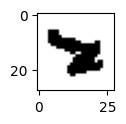

Actual Label: 9, Predicted Label: 7


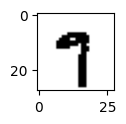

Actual Label: 7, Predicted Label: 3


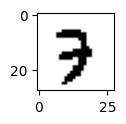

Actual Label: 2, Predicted Label: 8


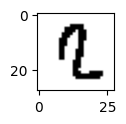

Actual Label: 2, Predicted Label: 8


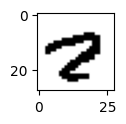

Actual Label: 5, Predicted Label: 8


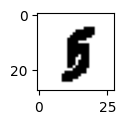

Actual Label: 2, Predicted Label: 0


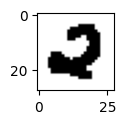

Actual Label: 6, Predicted Label: 5


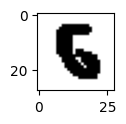

Actual Label: 5, Predicted Label: 6


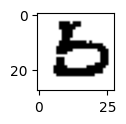

Actual Label: 8, Predicted Label: 4


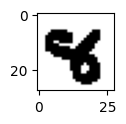

Actual Label: 2, Predicted Label: 4


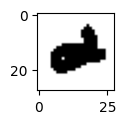

Actual Label: 3, Predicted Label: 9


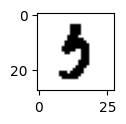

Actual Label: 9, Predicted Label: 8


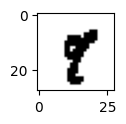

Actual Label: 8, Predicted Label: 0


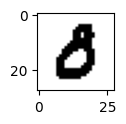

Actual Label: 6, Predicted Label: 0


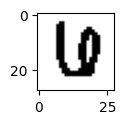

Actual Label: 9, Predicted Label: 4


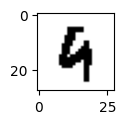

Actual Label: 9, Predicted Label: 0


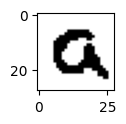

Actual Label: 0, Predicted Label: 8


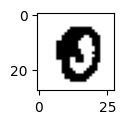

Actual Label: 8, Predicted Label: 4


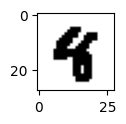

Actual Label: 7, Predicted Label: 8


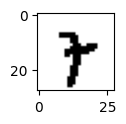

Actual Label: 2, Predicted Label: 3


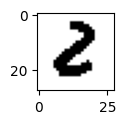

Actual Label: 1, Predicted Label: 6


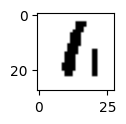

Actual Label: 7, Predicted Label: 9


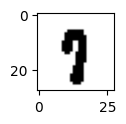

Actual Label: 2, Predicted Label: 3


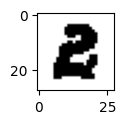

Actual Label: 1, Predicted Label: 8


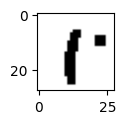

Actual Label: 3, Predicted Label: 7


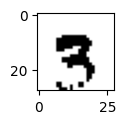

Actual Label: 8, Predicted Label: 6


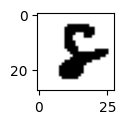

Actual Label: 4, Predicted Label: 7


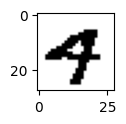

Actual Label: 7, Predicted Label: 0


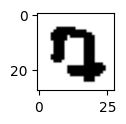

Actual Label: 4, Predicted Label: 0


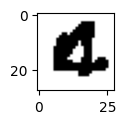

Actual Label: 5, Predicted Label: 3


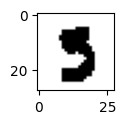

Actual Label: 3, Predicted Label: 8


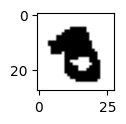

Actual Label: 3, Predicted Label: 8


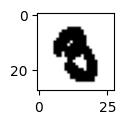

Actual Label: 3, Predicted Label: 9


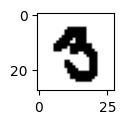

Actual Label: 3, Predicted Label: 8


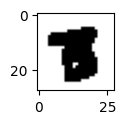

Actual Label: 9, Predicted Label: 3


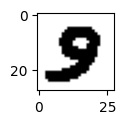

Actual Label: 9, Predicted Label: 5


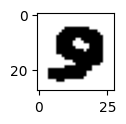

Actual Label: 9, Predicted Label: 3


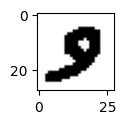

Actual Label: 9, Predicted Label: 3


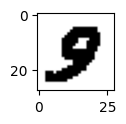

Actual Label: 9, Predicted Label: 5


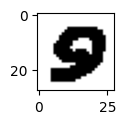

Actual Label: 9, Predicted Label: 0


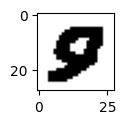

Actual Label: 9, Predicted Label: 0


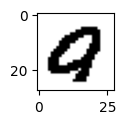

Actual Label: 9, Predicted Label: 7


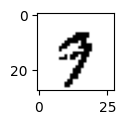

Actual Label: 2, Predicted Label: 6


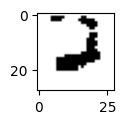

Actual Label: 0, Predicted Label: 7


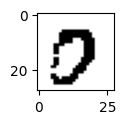

Actual Label: 8, Predicted Label: 2


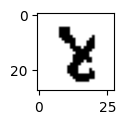

Actual Label: 0, Predicted Label: 8


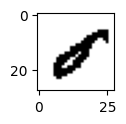

Actual Label: 6, Predicted Label: 4


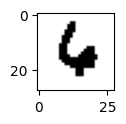

Actual Label: 4, Predicted Label: 8


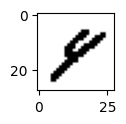

Actual Label: 5, Predicted Label: 8


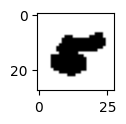

Actual Label: 2, Predicted Label: 4


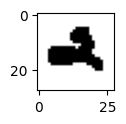

Actual Label: 1, Predicted Label: 8


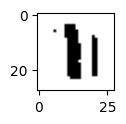

Actual Label: 2, Predicted Label: 1


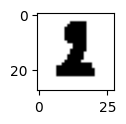

Actual Label: 5, Predicted Label: 8


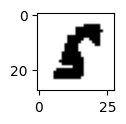

Actual Label: 2, Predicted Label: 1


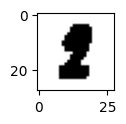

Actual Label: 8, Predicted Label: 5


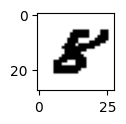

Actual Label: 8, Predicted Label: 6


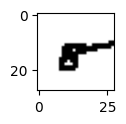

Actual Label: 8, Predicted Label: 6


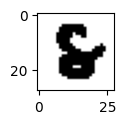

Actual Label: 7, Predicted Label: 2


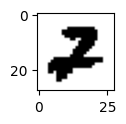

Actual Label: 7, Predicted Label: 2


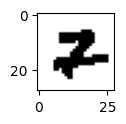

Actual Label: 7, Predicted Label: 2


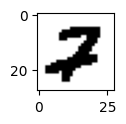

Actual Label: 1, Predicted Label: 8


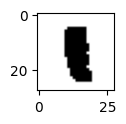

Actual Label: 1, Predicted Label: 8


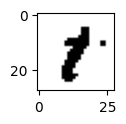

Actual Label: 9, Predicted Label: 4


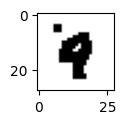

Actual Label: 0, Predicted Label: 8


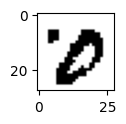

Actual Label: 9, Predicted Label: 7


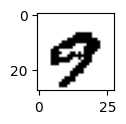

Actual Label: 2, Predicted Label: 7


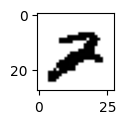

Actual Label: 9, Predicted Label: 7


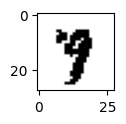

Actual Label: 5, Predicted Label: 6


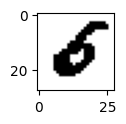

Actual Label: 5, Predicted Label: 6


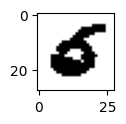

Actual Label: 2, Predicted Label: 8


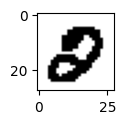

Actual Label: 5, Predicted Label: 0


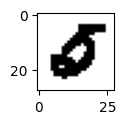

Actual Label: 2, Predicted Label: 8


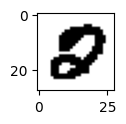

Actual Label: 4, Predicted Label: 7


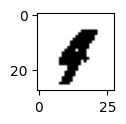

Actual Label: 2, Predicted Label: 8


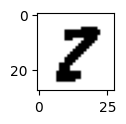

Actual Label: 2, Predicted Label: 7


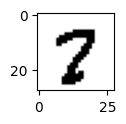

Actual Label: 9, Predicted Label: 5


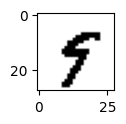

Actual Label: 3, Predicted Label: 7


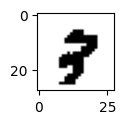

Actual Label: 5, Predicted Label: 6


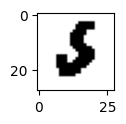

In [37]:
# Set model to evaluation or inference mode
net.eval()

# We don't need gradients for validation, so wrap in
# no_grad to save memory
with torch.no_grad():
    for data in testloader:
        images, labels = data

        # Move our data to GPU
        images = images.to(device)
        labels = labels.to(device)

        # Get our outputs
        outputs = net(images)

        # use torch.argmax() to get the predictions, argmax is used for long_tensors
        predictions = torch.argmax(outputs, dim=1)

        # For test data in each batch we identify when predictions did not match the labe
        # then we print out the actual ground truth
        for i in range(data[0].shape[0]):
            pred = predictions[i].item()
            label = labels[i]
            if(label != pred):
                print(f'Actual Label: {label}, Predicted Label: {pred}')
                img = np.reshape(images[i].cpu().numpy(),[28,28])
                imgshow("", np.uint8(img), size = 1)

**Creating Our Confusion Matrix**

In [38]:
from sklearn.metrics import confusion_matrix


# Initialize blank tensors to store our predictions and labels lists(tensors)
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')
label_list = torch.zeros(0, dtype=torch.long, device='cpu')

with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(device)
        classes = classes.to(device)
        outputs = net(inputs)
        _, preds = torch.max(outputs, 1)

        # Append batch prediction results
        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])
        label_list = torch.cat([label_list, classes.view(-1).cpu()])

# Confusion matrix
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())
print(conf_mat)

[[ 972    0    1    0    0    0    2    1    4    0]
 [   0 1122    2    1    0    0    3    1    6    0]
 [   4    4  994    7    3    0    4    6   10    0]
 [   0    0    0  998    0    3    0    4    3    2]
 [   1    0    0    0  967    0    4    2    2    6]
 [   3    0    0    5    0  871    6    1    5    1]
 [   6    2    0    0    2    2  942    0    4    0]
 [   1    2    9    3    0    0    0 1007    3    3]
 [   5    0    2    2    2    1    3    1  957    1]
 [   7    4    0    6    8    4    0    8    4  968]]


In [39]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

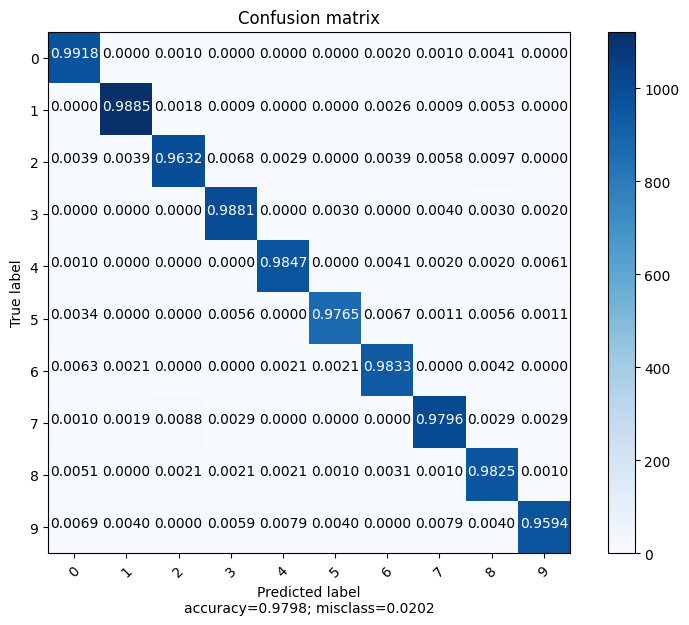

In [40]:
target_names = list(range(0,10))
plot_confusion_matrix(conf_mat, target_names)

In [41]:
# Per-class accuracy
class_accuracy = 100 * conf_mat.diagonal() / conf_mat.sum(1)

for (i,ca) in enumerate(class_accuracy):
    print(f'Accuracy for {i} : {ca:.3f}%')

Accuracy for 0 : 99.184%
Accuracy for 1 : 98.855%
Accuracy for 2 : 96.318%
Accuracy for 3 : 98.812%
Accuracy for 4 : 98.473%
Accuracy for 5 : 97.646%
Accuracy for 6 : 98.330%
Accuracy for 7 : 97.957%
Accuracy for 8 : 98.255%
Accuracy for 9 : 95.937%


In [42]:
from sklearn.metrics import classification_report

print(classification_report(label_list.numpy(), pred_list.numpy()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.98      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

